In [4]:
import tensorflow as tf

In [5]:
pip install scikit-learn

You should consider upgrading via the 'G:\practice_py\Tensorflow\dog vs cat classification\virenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
colorama                     0.4.5
contourpy                    1.0.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.1.1
fastjsonschema               2.16.2
Flask                        2.2.2
flatbuffers                  22.9.24
f

You should consider upgrading via the 'G:\practice_py\Tensorflow\dog vs cat classification\virenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [8]:
#generators
train_dataset=keras.utils.image_dataset_from_directory(
directory='Dataset/Train',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(224,224)
)
test_dataset=keras.utils.image_dataset_from_directory(
directory='Dataset/Test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(224,224)
)

Found 416 files belonging to 2 classes.
Found 126 files belonging to 2 classes.


In [9]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_dataset=trian_dataset.map(process)
test_dataset=test_dataset.map(process)

In [10]:
from keras.layers import BatchNormalization,Dropout

In [21]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    
    Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),padding='valid'),

    #dense
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid')
    ])
    

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
patron=model.fit(train_dataset,epochs=10,validation_data=test_dataset)
patron

Epoch 1/10
13/13 [==============================] - 69s 5s/step - loss: 5.6788 - accuracy: 0.6731 - val_loss: 0.8302 - val_accuracy: 0.3810
Epoch 2/10
13/13 [==============================] - 71s 5s/step - loss: 2.5538 - accuracy: 0.7788 - val_loss: 1.0066 - val_accuracy: 0.3730
Epoch 3/10
13/13 [==============================] - 67s 5s/step - loss: 1.7783 - accuracy: 0.8438 - val_loss: 5.1810 - val_accuracy: 0.3095
Epoch 4/10
13/13 [==============================] - 68s 5s/step - loss: 0.9295 - accuracy: 0.8750 - val_loss: 6.4529 - val_accuracy: 0.3095
Epoch 5/10
13/13 [==============================] - 68s 5s/step - loss: 1.0366 - accuracy: 0.8678 - val_loss: 13.2454 - val_accuracy: 0.3095
Epoch 6/10
13/13 [==============================] - 83s 6s/step - loss: 0.8744 - accuracy: 0.8750 - val_loss: 16.8026 - val_accuracy: 0.3095
Epoch 7/10
13/13 [==============================] - 71s 5s/step - loss: 0.4806 - accuracy: 0.9375 - val_loss: 25.4872 - val_accuracy: 0.3095
Epoch 8/10
13/13 

In [5]:
import matplotlib.pyplot as plt

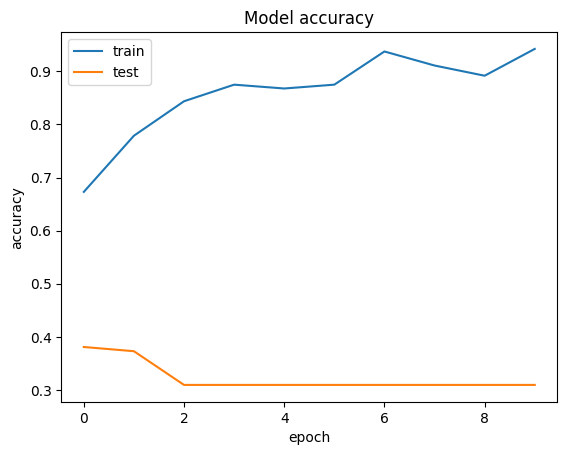

In [27]:
# patron summarize history for accuracy
plt.plot(patron.history['accuracy'])
plt.plot(patron.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [28]:
#very poor test accuracy

In [6]:
plt.plot(patron.history['loss'])
plt.plot(patron.history['val_loss'])
plt.legend(['train','test'])
plt.show()

NameError: name 'patron' is not defined

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vggnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
# don't train existing weights
for layer in vggnet.layers:
    layer.trainable = False

In [13]:

vggnet.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [15]:
print(folders)
print(len(folders))

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']
2


In [16]:
# our layers - you can add more if you want
x = Flatten()(vggnet.output)

In [17]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [18]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vggnet.input, outputs=prediction)

In [19]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 416 images belonging to 2 classes.


In [27]:
len(training_set)

13

In [25]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 126 images belonging to 2 classes.


In [26]:
len(test_set)

4

In [28]:
# fit the model
# Run the cell. It will take some time to execute
kundali = model.fit(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=13,#even if you dont mention,it will fit & run=416/32=13 training dataset
  validation_steps=4#similarly for validation dataset 126/32=4
)

Epoch 1/7
13/13 [==============================] - 321s 25s/step - loss: 0.3003 - accuracy: 0.8870 - val_loss: 0.3909 - val_accuracy: 0.8333
Epoch 2/7
13/13 [==============================] - 296s 23s/step - loss: 0.2867 - accuracy: 0.9062 - val_loss: 0.3958 - val_accuracy: 0.8492
Epoch 3/7
13/13 [==============================] - 325s 25s/step - loss: 0.2644 - accuracy: 0.9111 - val_loss: 0.3671 - val_accuracy: 0.8889
Epoch 4/7
13/13 [==============================] - 327s 26s/step - loss: 0.2571 - accuracy: 0.9255 - val_loss: 0.3485 - val_accuracy: 0.8651
Epoch 5/7
13/13 [==============================] - 271s 21s/step - loss: 0.2766 - accuracy: 0.8870 - val_loss: 0.4444 - val_accuracy: 0.7540
Epoch 6/7
13/13 [==============================] - 262s 20s/step - loss: 0.2279 - accuracy: 0.9279 - val_loss: 0.3932 - val_accuracy: 0.8254
Epoch 7/7
13/13 [==============================] - 262s 20s/step - loss: 0.2172 - accuracy: 0.9447 - val_loss: 0.3872 - val_accuracy: 0.8175


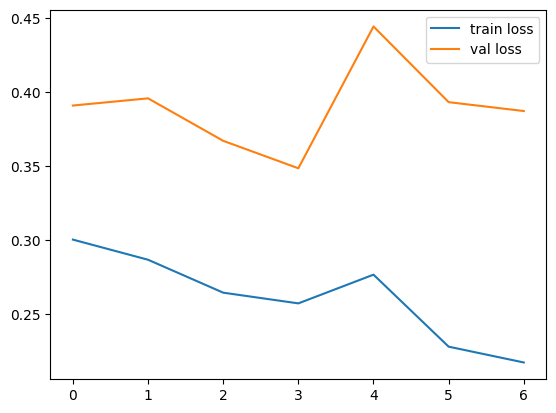

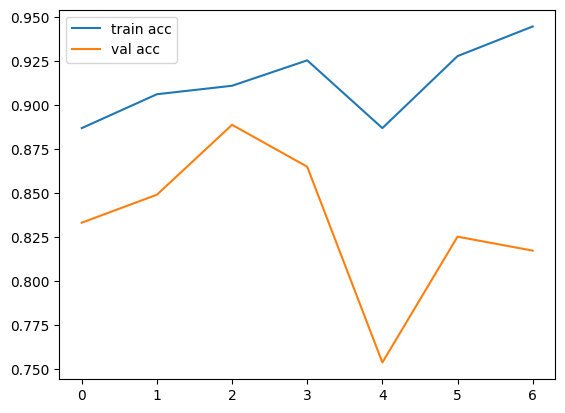

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the loss
plt.plot(kundali.history['loss'], label='train loss')
plt.plot(kundali.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(kundali.history['accuracy'], label='train acc')
plt.plot(kundali.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Model_vgg19_malariah5.h5')

In [31]:
y_pred = model.predict(test_set)

4/4 [==============================] - 50s 13s/step


In [32]:
y_pred

array([[1.06888585e-01],
       [5.13696909e-01],
       [8.90746042e-02],
       [8.87704909e-01],
       [7.58653939e-01],
       [7.89680660e-01],
       [2.92616546e-01],
       [7.40950048e-01],
       [8.24889839e-01],
       [7.38085434e-03],
       [3.59704308e-02],
       [5.44280350e-01],
       [2.80055702e-01],
       [8.01907420e-01],
       [7.79182494e-01],
       [9.29434896e-01],
       [8.19752038e-01],
       [1.80258915e-01],
       [3.54027748e-02],
       [1.87807474e-02],
       [1.55819401e-01],
       [3.33934247e-01],
       [7.14631915e-01],
       [9.11922514e-01],
       [8.56949151e-01],
       [9.53984633e-02],
       [5.41553378e-01],
       [5.19770265e-01],
       [2.55777687e-03],
       [7.26034641e-01],
       [1.85128167e-01],
       [9.29224670e-01],
       [5.79697490e-01],
       [2.10892688e-02],
       [8.40985961e-03],
       [2.25558821e-02],
       [5.52803040e-01],
       [8.62903774e-01],
       [4.30143684e-01],
       [7.53401756e-01],


In [38]:
y_pred.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('Model_vgg19_malariah5.h5')

In [68]:
img=image.load_img('uploads/C39P4thinF_original_IMG_20150622_105803_cell_91.png',target_size=(224,224))

In [69]:
i=image.img_to_array(img)
i

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [70]:
import cv2

In [85]:
test_img=cv2.imread('uploads/C1_thinF_IMG_20150604_104942_cell_59.png')

In [86]:
test_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

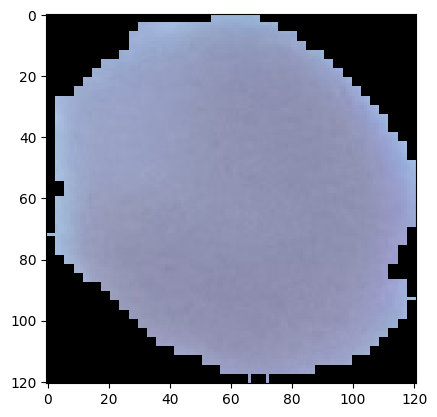

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape

(121, 121, 3)

In [89]:
test_img=cv2.resize(test_img,(224,224))

In [90]:
test_img=test_img/255

In [91]:
test_input=test_img.reshape((1,224,224,3))

In [92]:
model.predict(test_input)

1/1 [==============================] - 0s 334ms/step


array([[0.8960386]], dtype=float32)

In [94]:
result = model.predict(test_input)
result 


1/1 [==============================] - 0s 341ms/step


array([[0.8960386]], dtype=float32)

In [95]:
result = result.flatten()
result

array([0.8960386], dtype=float32)

In [96]:
result = round(result[0])
result

1